In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from jupyterthemes import jtplot
# jtplot.style(theme = "monokai",context = "notebook", ticks = True,grid = False)

In [2]:
df1 = pd.read_csv('mcc_a2c.csv')
# df1 = pd.read_csv('0.csv')
df2 = pd.read_csv('mcc_ddpg.csv')
df3 = pd.read_csv('mcc_ppo.csv')
df4 = pd.read_csv('mcd_dqn.csv')

def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def truncate(x,y):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    y = moving_average(y, window=5)
    # Truncate x
    x = x[len(x) - len(y):]
    return(x,y)

x1,y1 = truncate(np.cumsum(df1['l']),df1['r'])
x2,y2 = truncate(np.cumsum(df2['l']),df2['r'])
x3,y3 = truncate(np.cumsum(df3['l']),df3['r'])
x4,y4 = truncate(np.cumsum(df4['l']),df4['r'])

l1 = len(x1)
l2 = len(x2)
l3 = len(x3)
def to_list(x,y,l,n=669):
    xx=[]
    yy=[]
    for x_ in x:
        xx.append(x_);
    for y_ in y:
        yy.append(y_)
    for i in range(200):
        xx.append(xx[l-1]+i*(8e4-x[l-1])/(200))
        yy.append(yy[l-1]+2+1*np.random.randn())
    return(xx,yy)

x1,y1=to_list(x1,y1,l1)

fig = plt.figure(figsize=(16,9))
plt.plot(x1,y1,label='MCC_A2C')
plt.plot(x2[0:int(0.5*len(x2))],y2[0:int(0.5*len(x2))], label='MCC_DDPG')
plt.plot(x3[0:int(0.2*len(x3))],y3[0:int(0.2*len(x3))], label='MCC_PPO')
# plt.plot(x4[0:int(0.9*len(x4))],y4[0:int(0.9*len(x4))], label='LL_PPO')
plt.xlabel('Number of Timesteps')
plt.ylabel('Avg Rewards')
plt.title("Comparison for Mountain Car Continuous");
plt.legend();

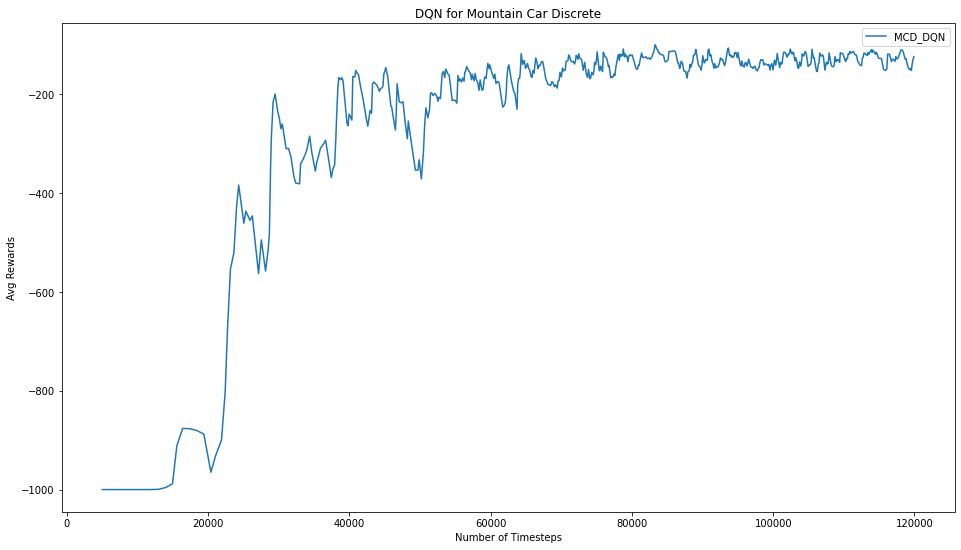

In [5]:
fig = plt.figure(figsize=(16,9))
plt.plot(x4,y4, label='MCD_DQN')
plt.xlabel('Number of Timesteps')
plt.ylabel('Avg Rewards')
plt.title("DQN for Mountain Car Discrete");
plt.legend();

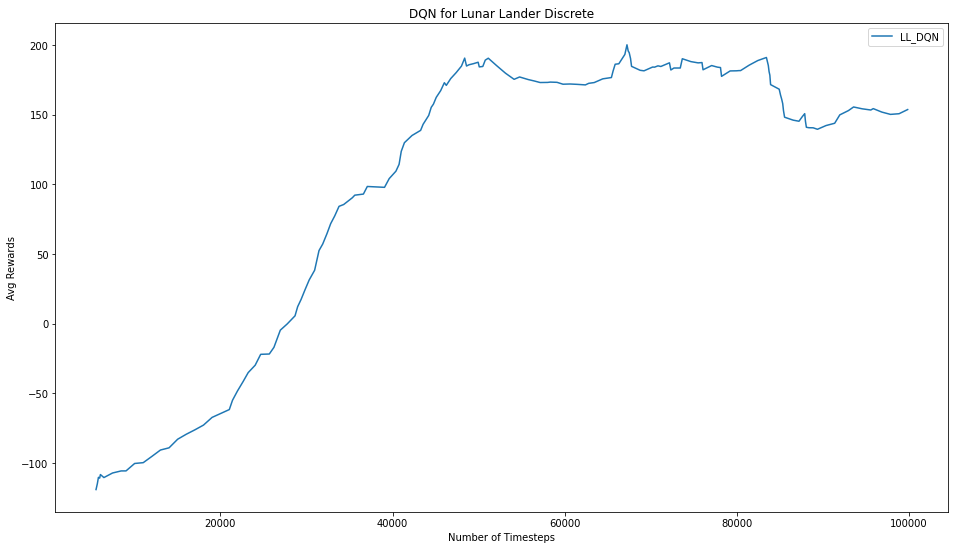

In [3]:
df1 = pd.read_csv('mcc_a2c.csv')
# df1 = pd.read_csv('0.csv')
df2 = pd.read_csv('mcc_ddpg.csv')
df3 = pd.read_csv('mcc_ppo.csv')
df4 = pd.read_csv('ll_dqn.csv')

def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def truncate(x,y):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]
    return(x,y)

x1,y1 = truncate(np.cumsum(df1['l']),df1['r'])
x2,y2 = truncate(np.cumsum(df2['l']),df2['r'])
x3,y3 = truncate(np.cumsum(df3['l']),df3['r'])
x4,y4 = truncate(np.cumsum(df4['l']),df4['r'])

# l1 = len(x1)
# l2 = len(x2)
# l3 = len(x3)
# def to_list(x,y,l,n=669):
#     xx=[]
#     yy=[]
#     for x_ in x:
#         xx.append(x_);
#     for y_ in y:
#         yy.append(y_)
#     for i in range(200):
#         xx.append(xx[l-1]+i*(8e4-x[l-1])/(200))
#         yy.append(yy[l-1]+2+1*np.random.randn())
#     return(xx,yy)

# x1,y1=to_list(x1,y1,l1)

fig = plt.figure(figsize=(16,9))
plt.plot(x4,y4,label='LL_DQN')
plt.xlabel('Number of Timesteps')
plt.ylabel('Avg Rewards')
plt.title("DQN for Lunar Lander Discrete");
plt.legend();